In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn as sk

warnings.filterwarnings('ignore')

In [ ]:
# import from google drive
from google.colab import drive
drive.mount('/content/drive')

# Use the correct path to the file in your Google Drive
df = pd.read_csv('/content/drive/MyDrive/insurance.csv') # Replace 'your_folder_name/your_file_name.csv' with the actual path to your file


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum() #There are no null values

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape #One dupe dropped

(1337, 7)

In [ ]:
numeric_columns=df[['age', 'bmi', 'children', 'charges']]
print(numeric_columns)

      age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1337 rows x 4 columns]


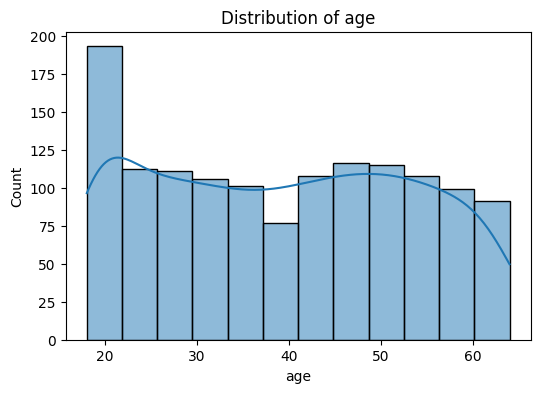

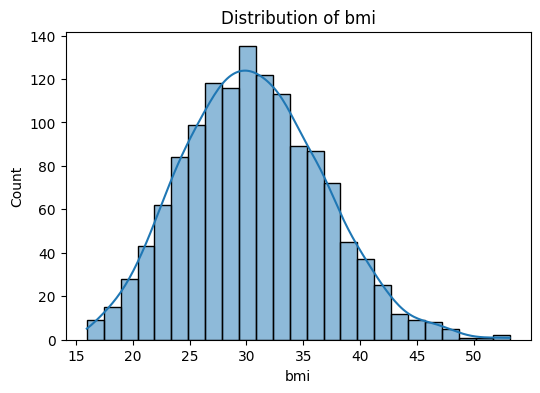

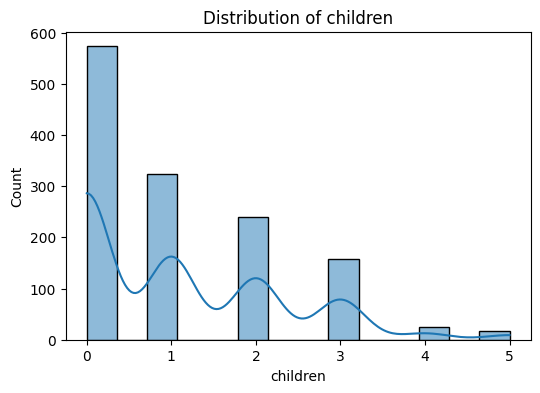

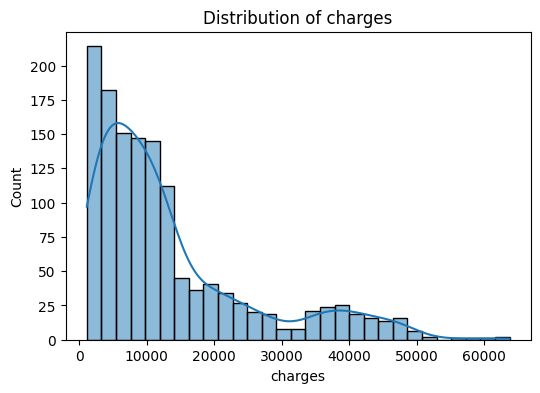

In [ ]:
#checking values spread via graph representation

for col in numeric_columns:
  plt.figure(figsize=(6,4),dpi=100)
  sns.histplot(df[col],kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

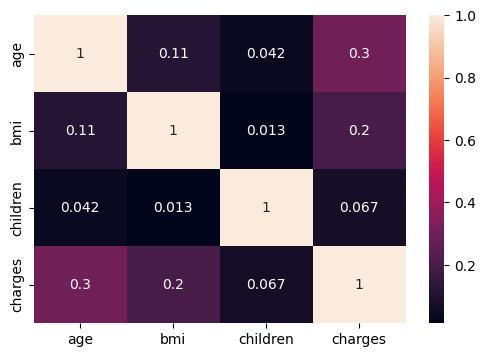

In [ ]:
#Correlation check

plt.figure(figsize=(6,4),dpi=100)
sns.heatmap(numeric_columns.corr(),annot=True)
plt.show()

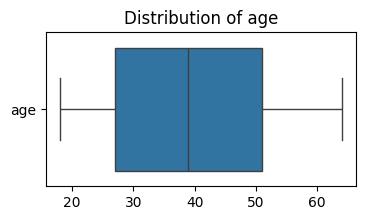

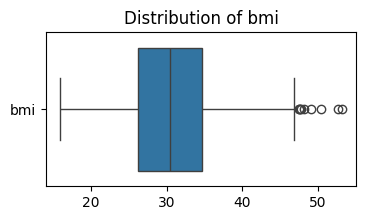

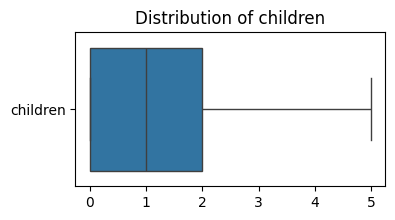

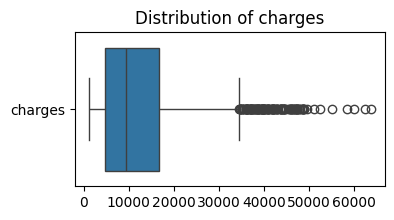

In [ ]:
#checking outliers horizontal

for col in numeric_columns:
  plt.figure(figsize=(4,2),dpi=100)
  sns.boxplot([df[col]],orient="h")
  plt.title(f'Distribution of {col}')
  plt.show()

In [ ]:
df_cleaned=df.copy()

In [ ]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#label encoding for sex, smoker

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le.fit(df_cleaned['sex'])
df_cleaned['sex']=le.transform(df_cleaned['sex'])

le.fit(df_cleaned['smoker'])
df_cleaned['smoker']=le.transform(df_cleaned['smoker'])

In [ ]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
df_cleaned.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df_cleaned.shape

(1337, 7)

In [ ]:
df_cleaned['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [ ]:
#one hot encoding for region

df_cleaned=pd.get_dummies(df_cleaned,columns=['region'])

In [ ]:
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [ ]:
df_cleaned=df_cleaned.astype(int)

In [ ]:
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,0,1
1,18,1,33,1,0,1725,0,0,1,0
2,28,1,33,3,0,4449,0,0,1,0
3,33,1,22,0,0,21984,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0


In [ ]:
df_cleaned.rename(columns={'sex':'is female','smoker':'is_smoker',},inplace=True)

In [ ]:
df_cleaned.head()

,age,is female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,0,1
1,18,1,33,1,0,1725,0,0,1,0
2,28,1,33,3,0,4449,0,0,1,0
3,33,1,22,0,0,21984,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0


<Axes: xlabel='bmi', ylabel='Count'>

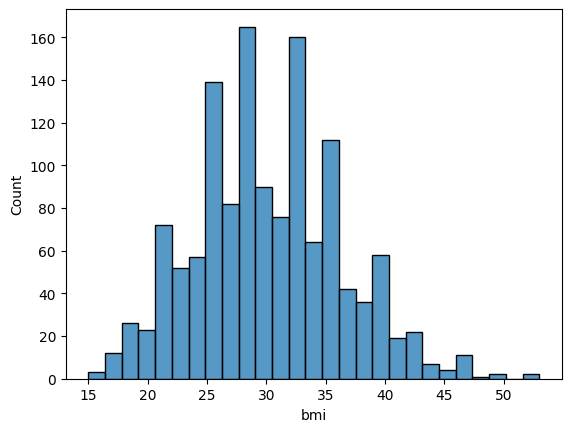

In [ ]:
#Feature Engg. and Extraction

sns.histplot(df_cleaned['bmi'])


In [ ]:
df_cleaned['bmi_category']=pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,np.inf],
    labels=['Underweight','Normal','Overweight','Obese']
    )

In [ ]:
df_cleaned.head()

,age,is female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,0,27,0,1,16884,0,0,0,1,Overweight
1,18,1,33,1,0,1725,0,0,1,0,Obese
2,28,1,33,3,0,4449,0,0,1,0,Obese
3,33,1,22,0,0,21984,0,1,0,0,Normal
4,32,1,28,0,0,3866,0,1,0,0,Overweight


In [ ]:
#one hot encoding for bmi category

df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'])

In [ ]:
df_cleaned

,age,is female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,0,27,0,1,16884,0,0,0,1,False,False,True,False
1,18,1,33,1,0,1725,0,0,1,0,False,False,False,True
2,28,1,33,3,0,4449,0,0,1,0,False,False,False,True
3,33,1,22,0,0,21984,0,1,0,0,False,True,False,False
4,32,1,28,0,0,3866,0,1,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,0,1,0,0,False,False,False,True
1334,18,0,31,0,0,2205,1,0,0,0,False,False,False,True
1335,18,0,36,0,0,1629,0,0,1,0,False,False,False,True
1336,21,0,25,0,0,2007,0,0,0,1,False,False,True,False


In [ ]:
df_cleaned=df_cleaned.astype(int)

In [ ]:
df_cleaned.head()

,age,is female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,0,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,1,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,1,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,1,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0,0,0,1,0


In [ ]:
df_cleaned.rename(columns=
 {'bmi_category_Normal':'normal',
  'bmi_category_Obese':'obese',
  'bmi_category_Overweight':'overweight',
  'bmi_category_Underweight':'underweight'},inplace=True)

In [ ]:
df_cleaned.head()

,age,is female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,underweight,normal,overweight,obese
0,19,0,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,1,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,1,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,1,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0,0,0,1,0


In [ ]:
#scale bmi, children,age

from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler=StandardScaler()
scaler.fit(df_cleaned[['bmi','children','age']])
df_cleaned[['bmi','children','age']]=scaler.transform(df_cleaned[['bmi','children','age']])

In [ ]:
df_cleaned.head()

,age,is female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,underweight,normal,overweight,obese
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,0,1,0,0,1,0
1,-1.511647,1,0.462463,-0.079442,0,1725,0,0,1,0,0,0,0,1
2,-0.799350,1,0.462463,1.580143,0,4449,0,0,1,0,0,0,0,1
3,-0.443201,1,-1.334960,-0.909234,0,21984,0,1,0,0,0,1,0,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,0,1,0,0,0,0,1,0


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_cleaned.head()

,age,is female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,underweight,normal,overweight,obese
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,0,1,0,0,1,0
1,-1.511647,1,0.462463,-0.079442,0,1725,0,0,1,0,0,0,0,1
2,-0.799350,1,0.462463,1.580143,0,4449,0,0,1,0,0,0,0,1
3,-0.443201,1,-1.334960,-0.909234,0,21984,0,1,0,0,0,1,0,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,0,1,0,0,0,0,1,0


In [ ]:
df_cleaned.columns

Index(['age', 'is female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'underweight', 'normal', 'overweight', 'obese'],
      dtype='object')

In [ ]:
#factors affecting charges

factors = ['age', 'is female', 'bmi', 'children', 'is_smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'underweight', 'normal', 'overweight', 'obese']

In [ ]:
#checking the correlation weight of each factor on charges

from scipy.stats import pearsonr

factors = ['age', 'is female', 'bmi', 'children', 'is_smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'underweight', 'normal', 'overweight', 'obese']

correlation = {
    factor: pearsonr(df_cleaned[factor], df_cleaned['charges'])[0]
    for factor in factors
}

correlation_df=pd.DataFrame(list(correlation.items()),columns=['Factor','Pearson correlation'])
correlation_df.sort_values(by='Pearson correlation',ascending=False,inplace=True)

correlation_df

,Factor,Pearson correlation
4,is_smoker,0.787234
0,age,0.298309
12,obese,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
1,is female,0.058046
5,region_northeast,0.005946
6,region_northwest,-0.038695
8,region_southwest,-0.043637


In [ ]:
from scipy.stats import chi2_contingency

alpha = 0.05

categorical_columns = ['age', 'is female', 'is_smoker',
       'region_northeast', 'region_northwest', 'region_southeast','region_southwest',
                       'underweight', 'normal', 'overweight', 'obese']

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels = False, duplicates='drop')

chi2_results = {}

for category in categorical_columns:
    contingency_table = pd.crosstab(df_cleaned[category], df_cleaned['charges_bin'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    if p < alpha:
        decision = 'Reject Null (Keep Feature)'
    else:
        decision =  'Accept Null (Drop Feature)'

    chi2_results[category] = {
        'Chi-squared': chi2,
        'p-value': p,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p-value')
chi2_df

,Chi-squared,p-value,Decision
age,1509.13025,0.0,Reject Null (Keep Feature)
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is female,10.258784,0.01649,Reject Null (Keep Feature)
obese,8.515711,0.036473,Reject Null (Keep Feature)
region_northeast,6.438442,0.092122,Accept Null (Drop Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
overweight,4.25149,0.235557,Accept Null (Drop Feature)
normal,3.708088,0.29476,Accept Null (Drop Feature)
underweight,3.37403,0.337471,Accept Null (Drop Feature)


In [ ]:
df_cleaned.columns

Index(['age', 'is female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'underweight', 'normal', 'overweight', 'obese',
       'charges_bin'],
      dtype='object')

In [ ]:
df_final = df_cleaned.drop(columns=['region_northeast','region_southwest', 'region_northwest', 'overweight','normal','underweight','charges_bin'])

In [ ]:
df_final

,age,is female,bmi,children,is_smoker,charges,region_southeast,obese
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,1,0.462463,-0.079442,0,1725,1,1
2,-0.799350,1,0.462463,1.580143,0,4449,1,1
3,-0.443201,1,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,1,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,0,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,0,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,0,-0.844753,-0.909234,0,2007,0,0


In [123]:
df_final.to_csv('insurance_cleaned.csv',index=False)